# Micro Credit Defaulter Project


PROBLEM STATEMENT: To predict wether the customer will be paying loan amount in 5 days or not.


The target column for prediction is label where: '0': Non - Defaulter '1': Defaulter

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('microcreditdefault.csv')


In [3]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0000,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0000,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0000,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0000,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0000,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016
5,6,1,35819I70783,568.0000,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,7/2/2016
6,7,1,96759I84459,545.0000,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,7/5/2016
7,8,1,09832I90846,768.0000,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,8/5/2016
8,9,1,59772I84450,1191.0000,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,6/15/2016
9,10,1,56331I70783,536.0000,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,6/8/2016


UNDERSTANDING THE COLUMNS

In [4]:
data.columns


Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
data.dtypes


Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
Unnamed: 0              209593 non-null int64
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-nul

As we could observe from the above information column: msisdn(mobile number) pccircle(telecom circle) pdate(date) is object type and has to be converted to float or int after anlaysis in order to predict with this data



In [7]:
data.head()


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


In [8]:
data.tail()


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,6/17/2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,6/12/2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,7/29/2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,7/25/2016
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,7/7/2016


from extracting head and tail part of data we can conclude unnamed column is duplicate column of index hence we can drop unnamed column


In [9]:
data= data.drop(['Unnamed: 0'], axis=1)


label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

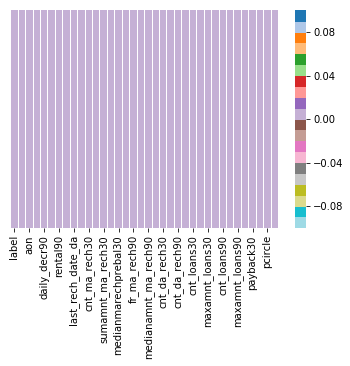

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='tab20_r')
('\n')
data.isnull().sum()

we have no null data in our dataset



In [11]:

for column in data.columns:
    if data[column].dtypes==object:
        print(str(column)+':'+str(data[column].unique()))
        print('..........................................')
        print('\n')

msisdn:['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
..........................................


pcircle:['UPW']
..........................................


pdate:['7/20/2016' '8/10/2016' '8/19/2016' '6/6/2016' '6/22/2016' '7/2/2016'
 '7/5/2016' '8/5/2016' '6/15/2016' '6/8/2016' '6/12/2016' '6/20/2016'
 '6/29/2016' '6/16/2016' '8/3/2016' '6/24/2016' '7/4/2016' '7/3/2016'
 '7/1/2016' '8/8/2016' '6/26/2016' '6/23/2016' '7/6/2016' '7/9/2016'
 '6/10/2016' '6/7/2016' '6/27/2016' '8/11/2016' '6/30/2016' '6/19/2016'
 '7/26/2016' '8/14/2016' '6/14/2016' '6/21/2016' '6/25/2016' '6/28/2016'
 '6/11/2016' '7/27/2016' '7/23/2016' '8/16/2016' '8/15/2016' '6/2/2016'
 '6/5/2016' '8/2/2016' '7/28/2016' '7/18/2016' '8/18/2016' '7/16/2016'
 '7/29/2016' '7/21/2016' '6/3/2016' '6/13/2016' '8/1/2016' '7/13/2016'
 '7/10/2016' '6/9/2016' '7/15/2016' '7/11/2016' '8/9/2016' '8/12/2016'
 '7/22/2016' '6/4/2016' '7/24/2016' '6/18/2016' '8/13/2016' '6/17/2016'
 '8/7/20

In object type column we could understand pcircle has only one telecom circle that is 'UPW' hence we can ignore this column



In [12]:

data= data.drop(['pcircle'], axis=1)

In [13]:
data['pdays']=pd.to_datetime(data.pdate,dayfirst=False).dt.day
data['pmonth']=pd.to_datetime(data.pdate,dayfirst=False).dt.month

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-null int64
medianamnt_ma_rech90    209593 non-nul

In [15]:
data.dtypes


label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [16]:
data.head(5)


,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pdays,pmonth
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0.0,2.0,12,6,0.0,29.000000,29.000000,7/20/2016,20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0.0,1.0,12,12,0.0,0.000000,0.000000,8/10/2016,10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0.0,1.0,6,6,0.0,0.000000,0.000000,8/19/2016,19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0.0,2.0,12,6,0.0,0.000000,0.000000,6/6/2016,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0.0,7.0,42,6,0.0,2.333333,2.333333,6/22/2016,22,6


DATA VISUALIZATION

STATISTICS SUMMARY

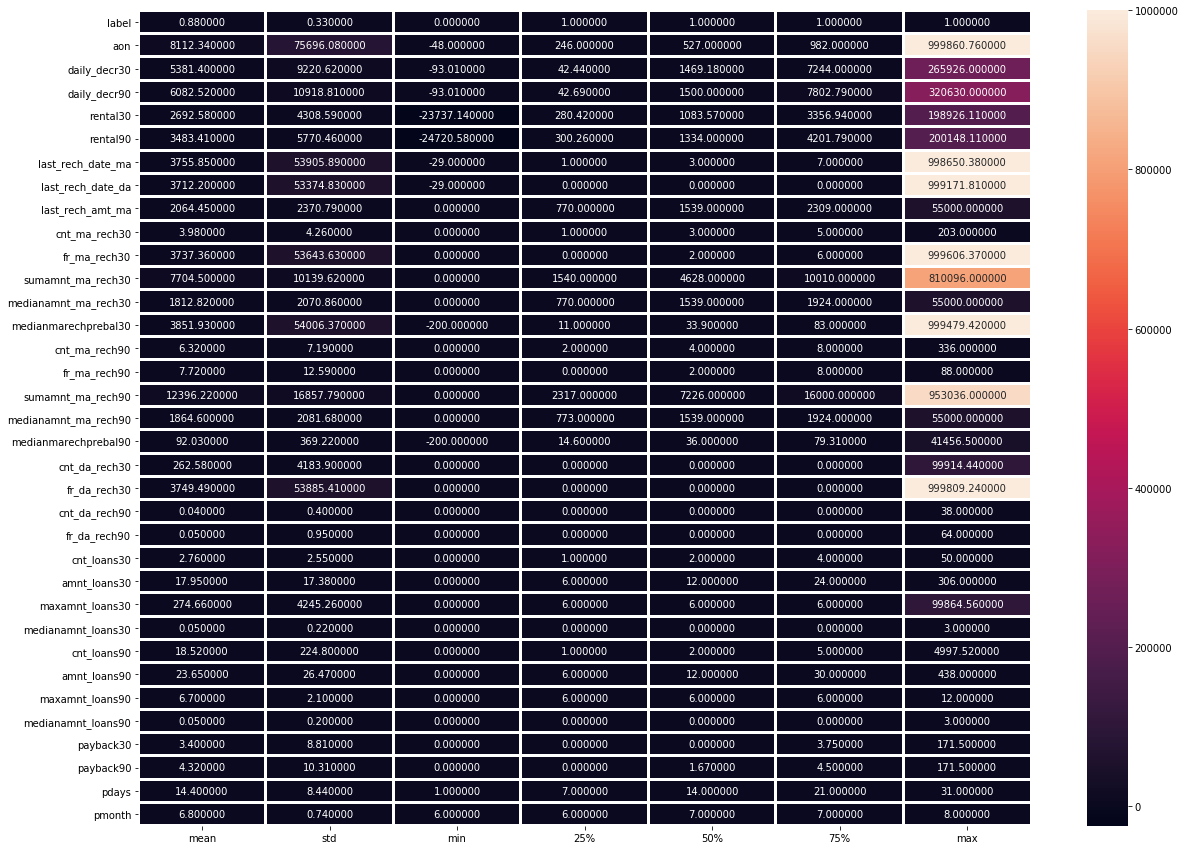

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")


plt.show()

describe option is used to understand the basic statistical details like mean, Standard Deviation, Percentiles which helps us to make a comparitive analysis and understand ho data is distributed

Difference between Q3 and max 'msisdn', 'aon', 'daily_decr30', 'daily_decr90','rental30', 'rental90', 'last_rech_date_ma','last_rech_date_da', 'fr_ma_rech30','sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30','sumamnt_ma_rech90','cnt_da_rech30', 'fr_da_rech30','maxamnt_loans30'.

Difference between Mean and Std: 'msisdn','aon','last_rech_date_ma','last_rech_date_da','fr_ma_rech30','medianmarechprebal30', 'medianmarechprebal90','cnt_da_rech30','fr_da_rech30','maxamnt_loans30','cnt_loan90'.

Difference between min and Q1: 'sumamnt_ma_rech90','medianmarechprebal90','medianamnt_ma_rech90','sumamnt_ma_rech30','medianmarechprebal30', 'medianamnt_ma_rech30',''last_rech_date_ma','last_rech_date_da','last_rech_amnt_ma','aon', 'daily_decr30', 'daily_decr90','rental30', 'rental90'

In [18]:
datacor=data.corr()


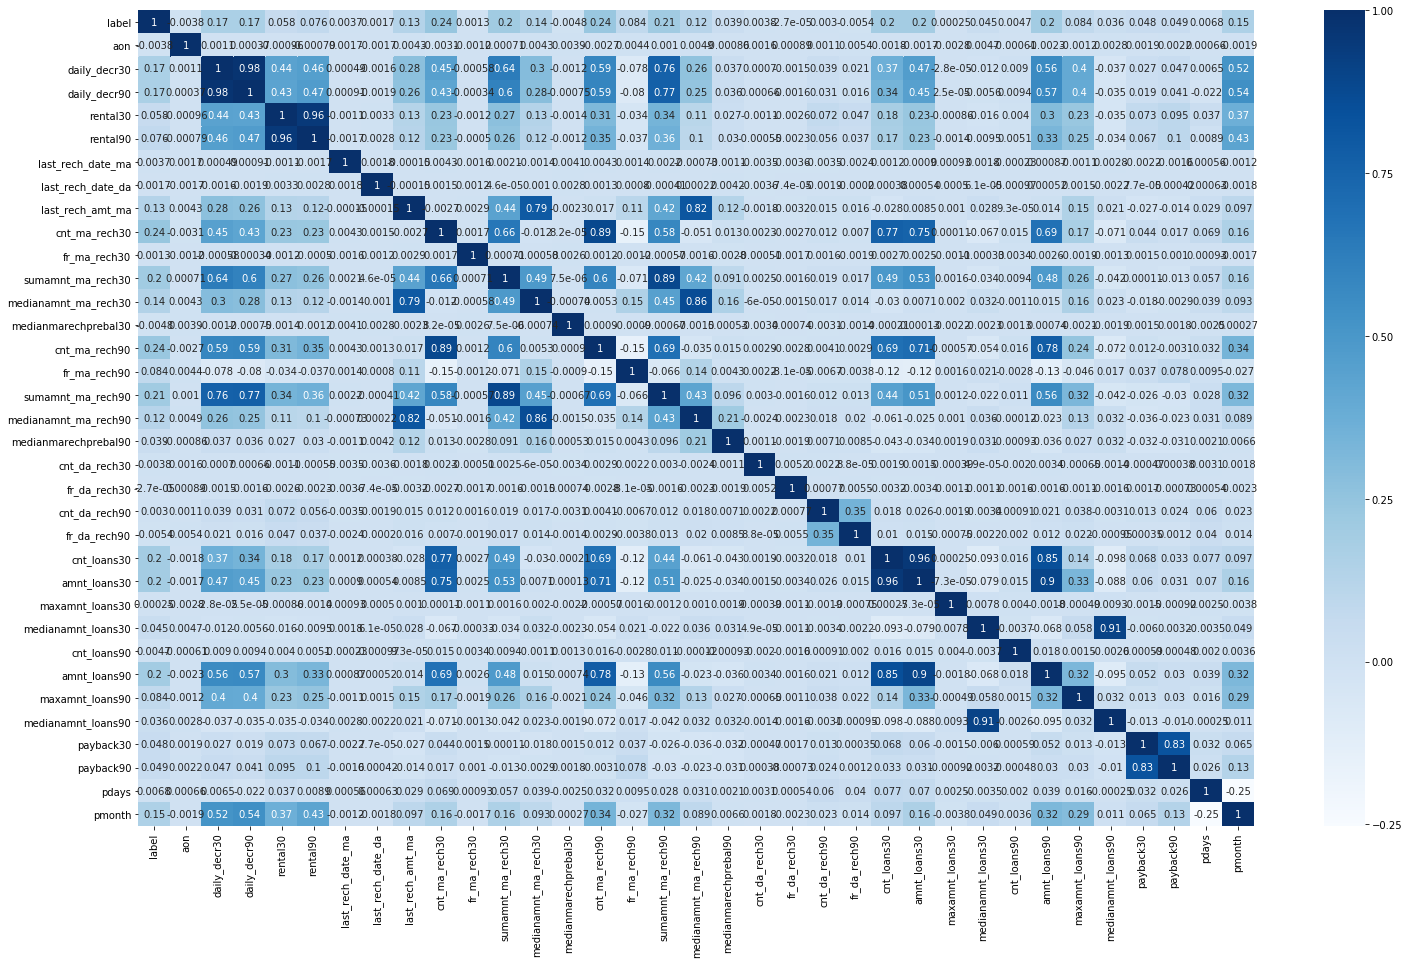

In [19]:

plt.figure(figsize=(25,15))
sns.heatmap(datacor,cmap='Blues',annot=True)
plt.show()

Text(0.5, 1.0, 'correlation with target variables')

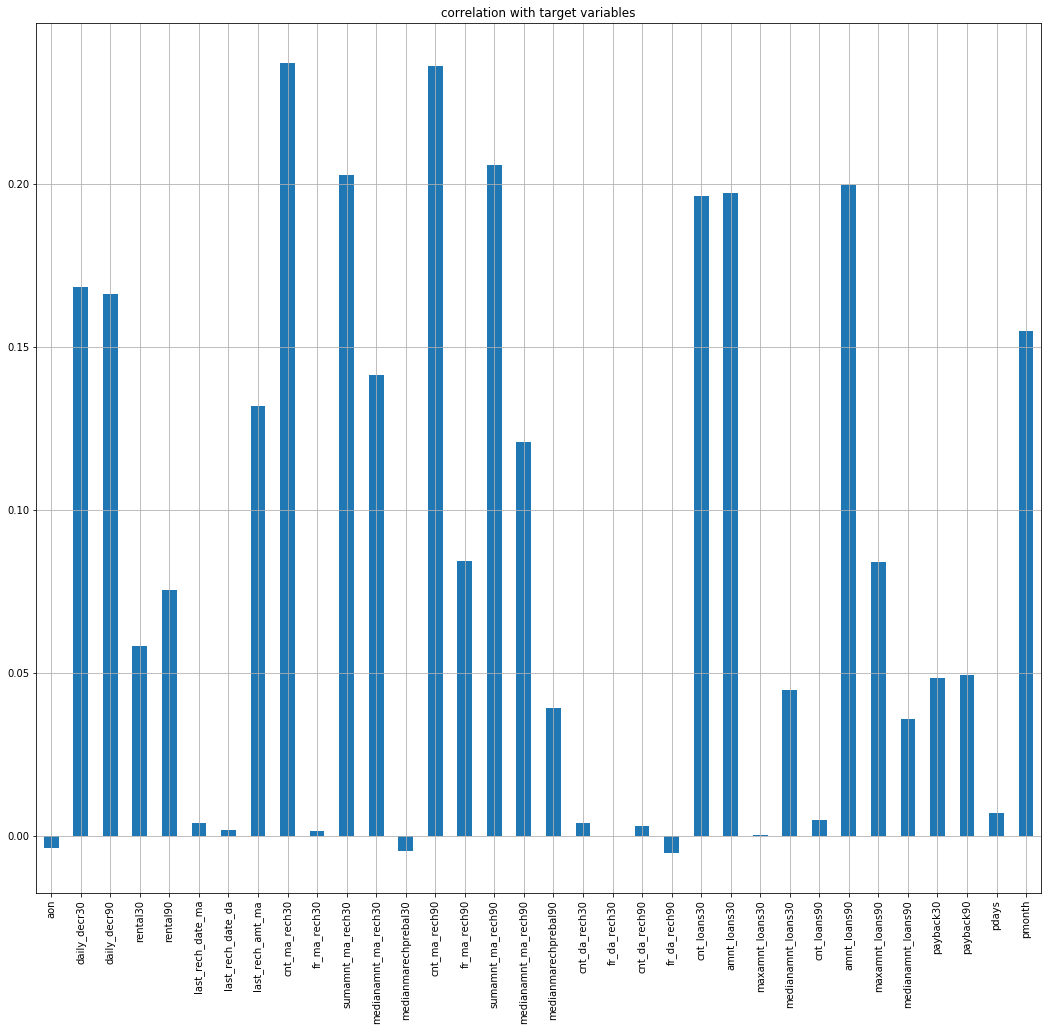

In [20]:
plt.figure(figsize=(18,16))
data.drop('label',axis=1).corrwith(data['label']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("correlation with target variables")

Postively high correlated variables:- 'cnt_ma_rech30':24% 'cnt_ma_rech90':24% 'sumamnt_ma_rech30':21% 'sumamnt_ma_rech90':21% 'cnt_loans30':20% 'amnt_loans30':20% 'amnt_loans90':20% 'daily_decr30': 17% 'daily_decr90':17% 'pdate':15%

Postive correlation:- 'medianamnt_ma_rech30':14% 'last_rech_amt_ma':13% 'medianamnt_ma_rech90':12% 'fr_ma_rech90':8% 'maxamnt_loans90':8.4% 'rental90':7.6% 'rental30':5.8% 'medianamnt_loans30':4% 'payback30':4% 'payback90':4% 'medianamnt_loans90'3.6% 'medianmarechprebal90':3%

negative correlation:- 'fr_da_rech90' 'cnt_loans90' 'medianmarechprebal30'

'maxamnt_loans30', error 'fr_da_rech30'- error

UNIVARIATE ANALYSIS

In [21]:
data.label.value_counts()


1    183431
0     26162
Name: label, dtype: int64

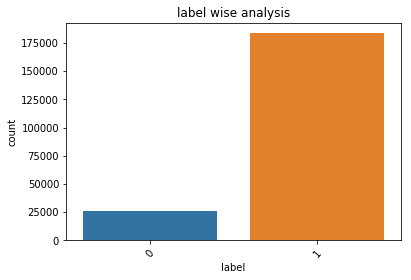

In [22]:
plt.subplots(figsize=(6,4))
sns.countplot(x='label',data=data)
plt.title("label wise analysis")
plt.xlabel('label')
plt.ylabel('count')
plt.xticks(rotation=50)

plt.show()

We can observe from above datas with respect to label column non-defaulter=0 has 26162 counts while defaulter has high population of 1,83,431

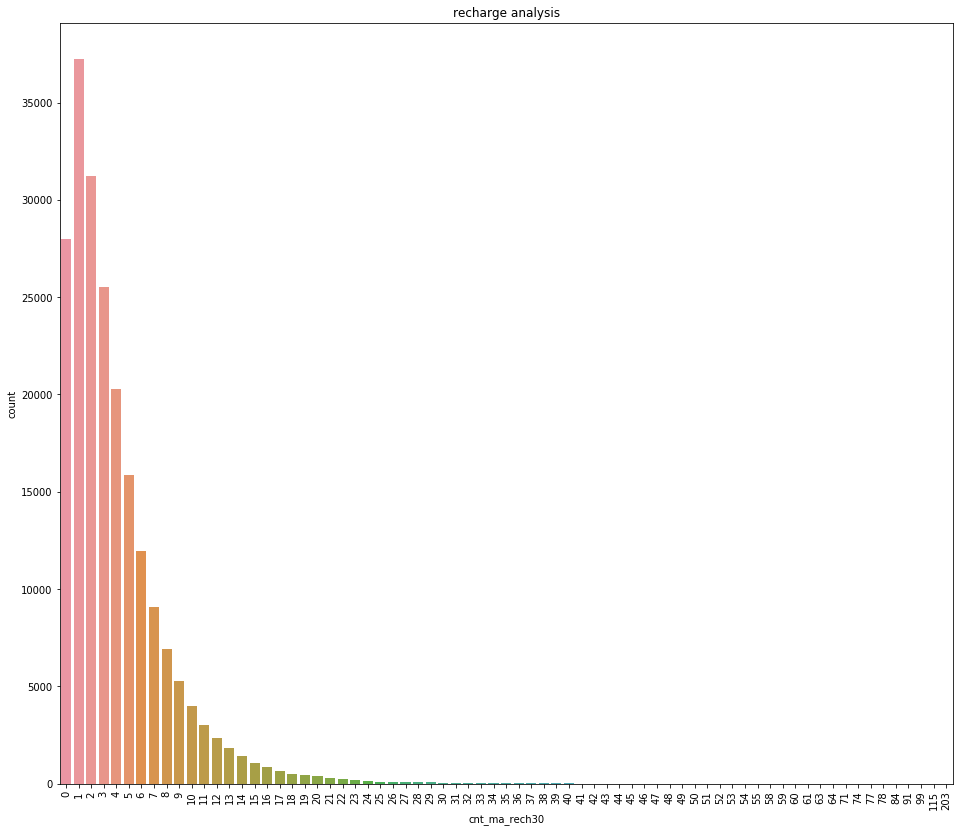

In [23]:
plt.subplots(figsize=(16,14))
sns.countplot(x='cnt_ma_rech30',data=data)
plt.title("recharge analysis")
plt.xlabel('cnt_ma_rech30')
plt.ylabel('count')
plt.xticks(rotation=90)

plt.show()

number of times main account got recharged in last 30 days analysis shows 1&2 times recharge is more number follwed by no recharge and 3,4,5 respectively, this depicts 35,000 people recharge once in last 30days 30,000 people recharge twice in last 30days approximately 23,000 people have made no recharge in last 30days

In [17]:
df = data.copy()

def chng1(prob):
    if prob == 0:
        return 'Defaulter'
    else:
        return 'Non-Defaulter'
df['label'] = df['label'].apply(chng1)

In order to analyse each column on basis number of defaulter and non - defaulter we are using define operand on label column



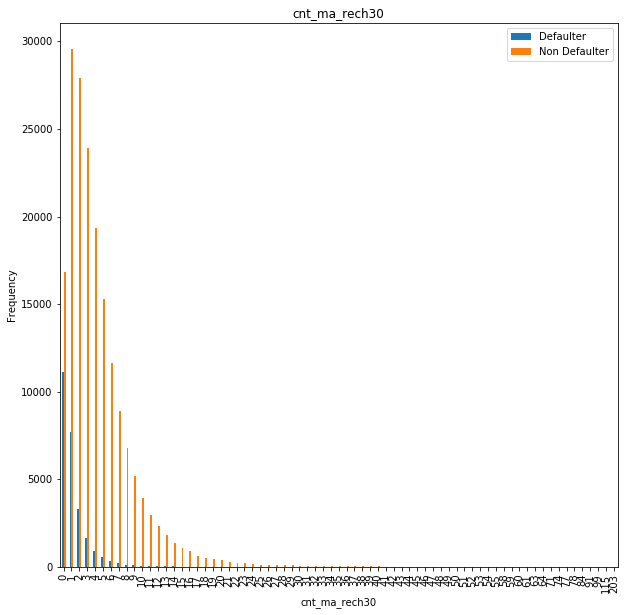

In [25]:
pd.crosstab(df.cnt_ma_rech30,df.label).plot(kind="bar",figsize=(10,10))
plt.title('cnt_ma_rech30')
plt.xlabel('cnt_ma_rech30')
plt.xticks(rotation=90)
plt.legend(["Defaulter", "Non Defaulter"])
plt.ylabel('Frequency')
plt.show()

cnt_ma_rech30=number of times main account got recharged in last 30days no recharge made in last 30days is highest of around 11,000 followed by once recharge made is around 8,000

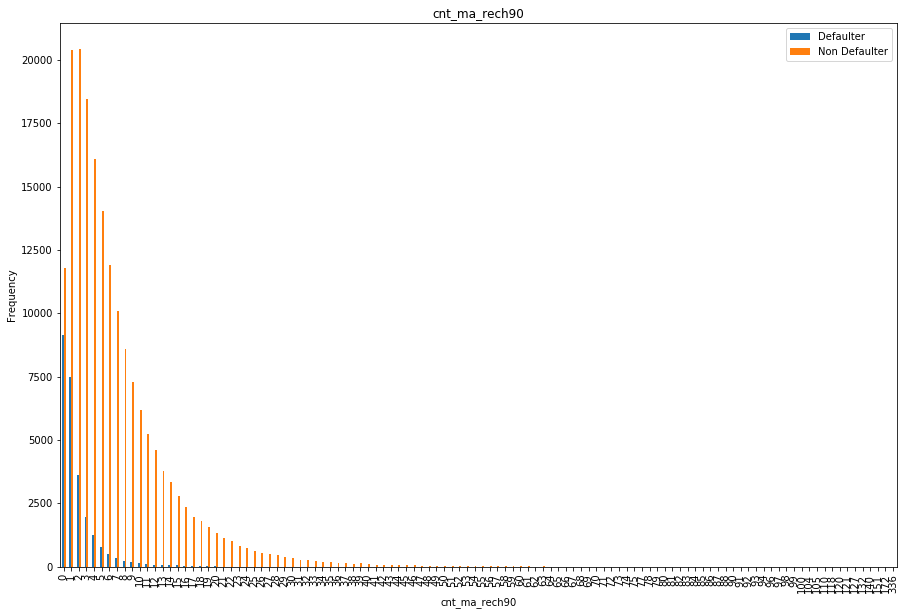

In [26]:
pd.crosstab(df.cnt_ma_rech90,df.label).plot(kind="bar",figsize=(15,10))
plt.title('cnt_ma_rech90')
plt.xlabel('cnt_ma_rech90')
plt.xticks(rotation=90)
plt.legend(["Defaulter", "Non Defaulter"])
plt.ylabel('Frequency')
plt.show()

cnt_ma_rech30=number of times main account got recharged in 90 last 90days While analaysing defaulters we could understand number of recharge made in last 90days is highest of around 9,000 followed by 7500 people made recharge once and 3000 people made recharge twice. Frequency of non - defaulters making recharge is 21,000 people made recharge once and twice,around 19, people made recharge three times

In [27]:
data.sumamnt_ma_rech30


0          3078.0
1          5787.0
2          1539.0
3             0.0
4         20029.0
5          6156.0
6          5787.0
7         10404.0
8          6164.0
9           773.0
10         2312.0
11         9065.0
12        19086.0
13         7703.0
14         3079.0
15            0.0
16            0.0
17            0.0
18         4618.0
19         9539.0
20         8867.0
21          773.0
22          770.0
23         6164.0
24            0.0
25        12674.0
26         5395.0
27          770.0
28        32149.0
29         3086.0
           ...   
209563    10727.0
209564    10007.0
209565     1539.0
209566     2593.0
209567     3078.0
209568     6542.0
209569     6361.0
209570     3848.0
209571     3848.0
209572     7526.0
209573    18469.0
209574        0.0
209575    14852.0
209576    26567.0
209577    11560.0
209578     6926.0
209579     7695.0
209580    11874.0
209581    12913.0
209582     1539.0
209583     4641.0
209584        0.0
209585     7696.0
209586    17243.0
209587    

In [28]:
df.columns


Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate', 'pdays', 'pmonth'],
      dtype='object')

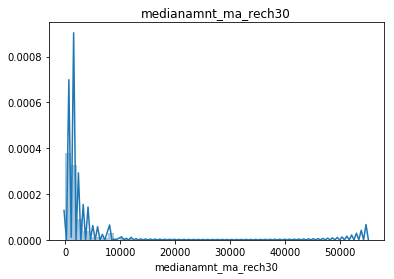

In [29]:
sns.distplot(data["medianamnt_ma_rech30"])

plt.title("medianamnt_ma_rech30")
plt.show()

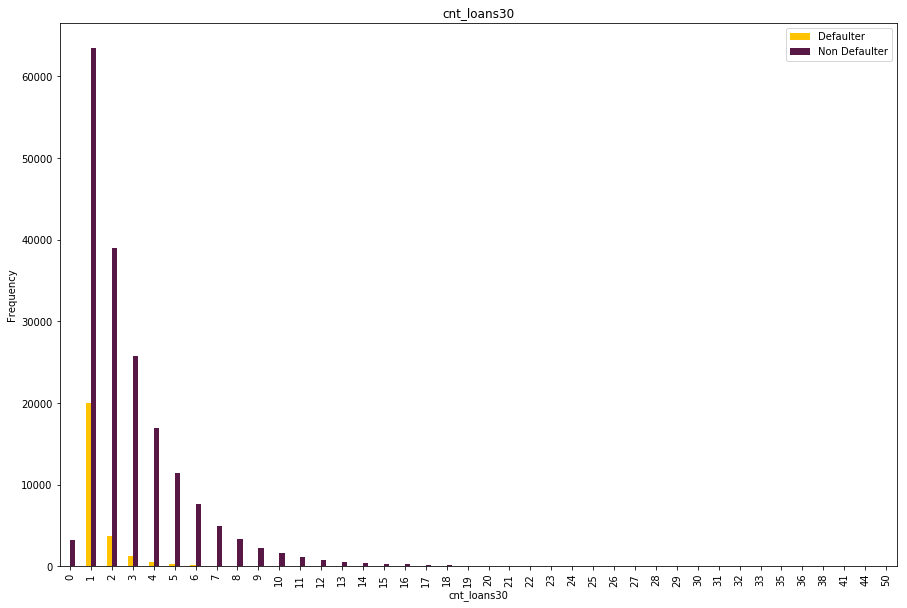

In [30]:
pd.crosstab(df.cnt_loans30,df.label).plot(kind="bar",figsize=(15,10),color=['#FFC300','#581845' ])
plt.title('cnt_loans30')
plt.xlabel('cnt_loans30')
plt.xticks(rotation=90)
plt.legend(["Defaulter", "Non Defaulter"])
plt.ylabel('Frequency')
plt.show()

cnt_loans30=number of times loan taken in last 30days 20,000 defaulters had taken loan once in last 30days 2,000 defaulters had taken loan twice in last 30days non defsulters of around 62,000 people has recharged once and 38,000 had recharged twice

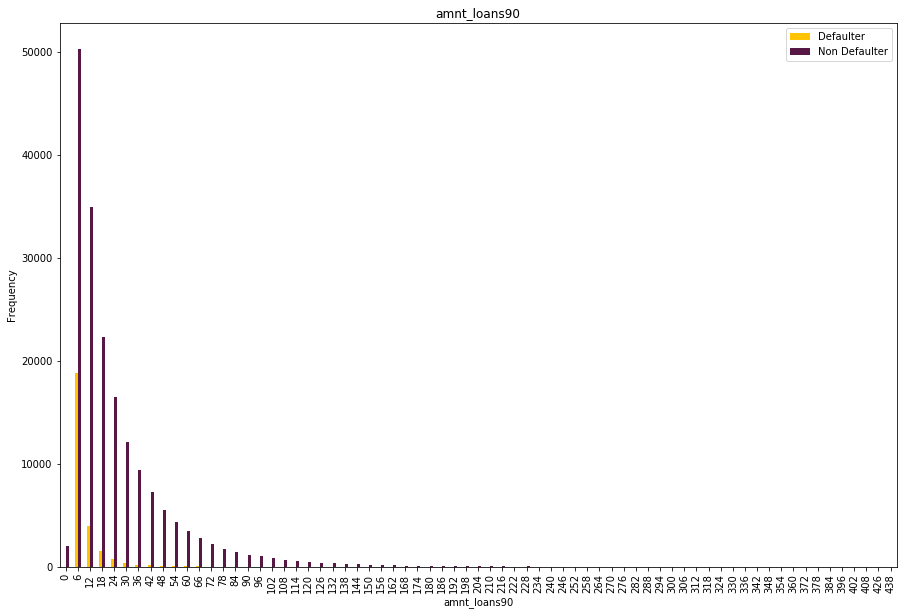

In [31]:
pd.crosstab(df.amnt_loans90,df.label).plot(kind="bar",figsize=(15,10),color=['#FFC300','#581845' ])
plt.title('amnt_loans90')
plt.xlabel('amnt_loans90')
plt.xticks(rotation=90)
plt.legend(["Defaulter", "Non Defaulter"])
plt.ylabel('Frequency')
plt.show()

amnt_loans90=total amount of loan taken in last 90 days In case of defauters around 19,000 people have taken loan 6 times in past 90 days 

BIVARIATE ANALYSIS

The target column for prediction is label where: '0': Non - Defaulter '1': Defaulter

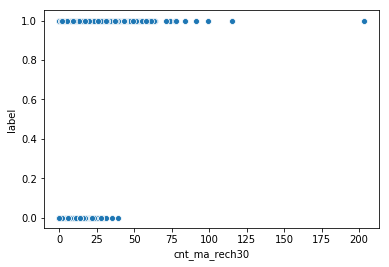

In [32]:
sns.scatterplot(x="cnt_ma_rech30",y="label",data=data)

cnt_ma_rech30=number of times main account got recharged in last 30days is more in number by the defaulters compared to non defaulters.

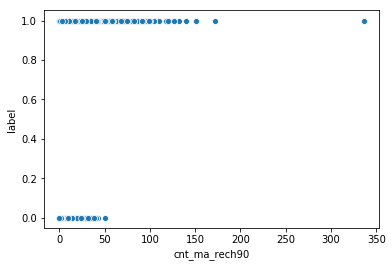

In [33]:
sns.scatterplot(x="cnt_ma_rech90",y="label",data=data)

cnt_ma_rech90=number of times main account got recharged in last 90days in case of frequency of recharge is around 150 recharges made by defaulters compared to non defaulters whose frequency is 50

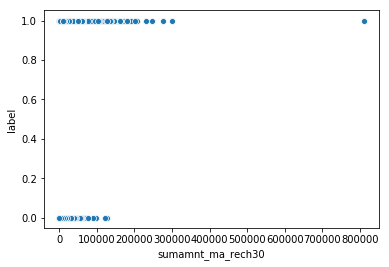

In [34]:
sns.scatterplot(x="sumamnt_ma_rech30",y="label",data=data)

sumamnt_ma_rech30= total amount of recharge in main accunt in last 30 days is highest in defaulters ranging between 0-2,00,000 while amount of recharge made by defaulters is around 0 - 1,00,000

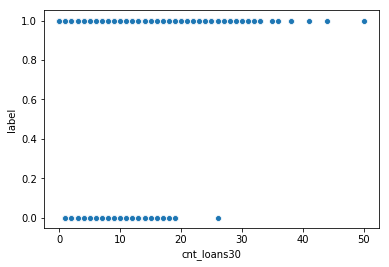

In [35]:
sns.scatterplot(x="cnt_loans30",y="label",data=data)

cnt_loans30= Number of loans taken by users in last 30 days frequency of recharge made by defaulters is highest ranging between 0-30 times in kast 30 days while non defaulters have made around 0 - 20 times in last 30days.

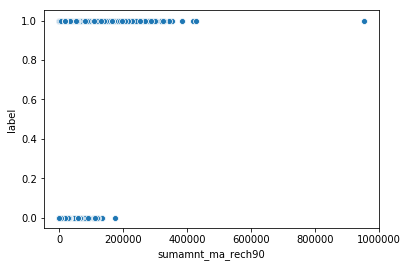

In [36]:
sns.scatterplot(x="sumamnt_ma_rech90",y="label",data=data)

sumamnt_ma_rech90= total amount of recharge in main accunt in last 90 days In case of non defaulters total recharge made is around 2,00,000 and defaulters have again made more amount of recharge ranging upto 4,00,00 in total

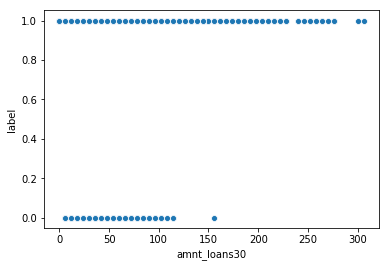

In [37]:
sns.scatterplot(x="amnt_loans30",y="label",data=data)

amnt_loans30= Total amount of loan taken by users in last 30 days is highest among defaulters ranging between 0 - 250 while among non defaulters it is between 0 - 100 Therfore amount of loan taken by defaulters are high compared to non defaulters

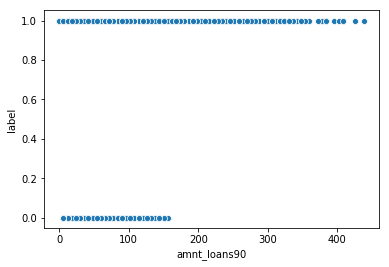

In [38]:
sns.scatterplot(x="amnt_loans90",y="label",data=data)

amnt_loans9= Total amount of loan taken by users in last 90days Even in 90 days the defaulters have taken highest amount of loan (0-400) compared to defaulters (0-150)

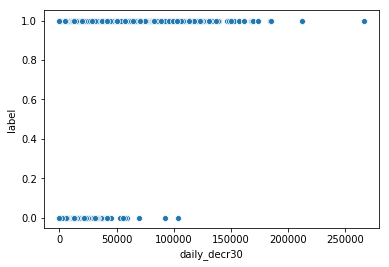

In [39]:
sns.scatterplot(x="daily_decr30",y="label",data=data)


daily_decr30 = daily amount spent from main account averaged in last 30 days defaulters has spent 2,00,000 where as non defaulters have sent around 50,000 Hence we can conclude defultters are the ones who are using and spending in high number and high amount

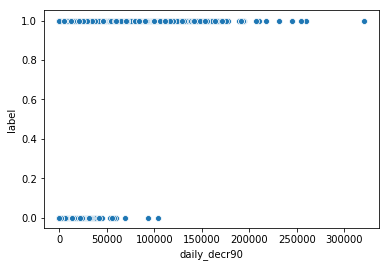

In [40]:
sns.scatterplot(x="daily_decr90",y="label",data=data)


daily_decr90 = daily amount spent from main account averaged in last 90 days defaulters has spent 2,00,000 - 2,50,000 where as non defaulters have sent around 50,000 - 60,0000 Hence we can conclude defultters are the ones who are using and spending in high number and high amount

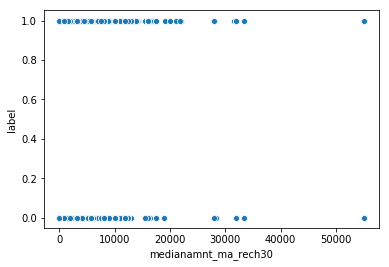

In [41]:
sns.scatterplot(x="medianamnt_ma_rech30",y="label",data=data)


medianamnt_ma_rech30 = median amount of recharges made in main account in last 30 days their is no much difference but we can observe the density is high among defaulters hence defaulters have recharged more amount

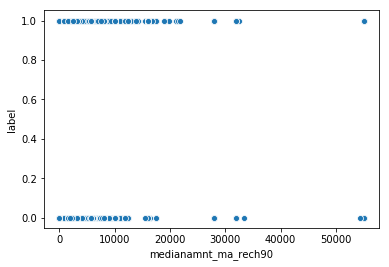

In [42]:
sns.scatterplot(x="medianamnt_ma_rech90",y="label",data=data)



medianamnt_ma_rech90 = median amount of recharges made in main account in last 90 day we can observe high among recharges are made by defaulters ranging 0 - 2,00,000 while non defaulters have recharged around 0 - 1,00,000 hence defaulters have recharged more amount

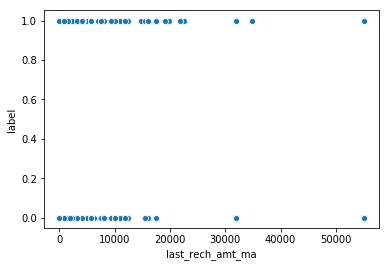

In [43]:
sns.scatterplot(x="last_rech_amt_ma",y="label",data=data)

last_rech_amt_ma = amount of last recharge on main account non defaulters have made recharge upto 18,000 while defaulters have made recharge upto 25,000 hence defaulters have made highest amount of recharge.

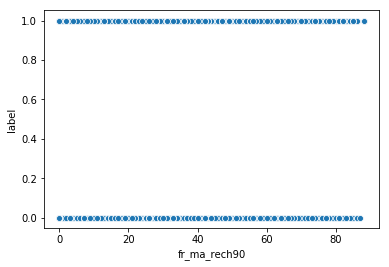

In [44]:
sns.scatterplot(x="fr_ma_rech90",y="label",data=data)


fr_ma_rech90 = frequency of main account got recharged in last 90days both defaulters and non defaulters have equally recharged in last 90 days while defaulters have slight high frequency

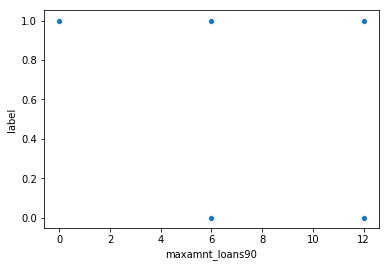

In [45]:
sns.scatterplot(x="maxamnt_loans90",y="label",data=data)


maxamnt_loans90 = maximum amount of loan taken in last 90 days
defaulters have taken loan from 0-12, while non defaulters have borrowed at range between 6 - 12 
we can understand non defaulters have borrowed from medium to high amount while defaulters have borrowed from low to high

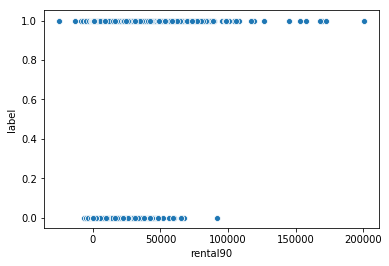

In [46]:
sns.scatterplot(x="rental90",y="label",data=data)


rental90 = average amount account balance in last 90 days non - defaulters have maintained balance total upto 55,000 defaulters have maintained upto 1,50,000 but we can also observe negative balance is maintained more by defaulters

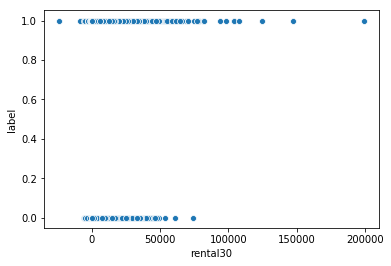

In [47]:
sns.scatterplot(x="rental30",y="label",data=data)


rental30 = average amount account balance in last 30 days defaulters have maintained balance total upto 1,00,000 non - defaulters have maintained balance total upto 55,000 we can understand non defaulters have maintained both in 90 and 30 days balance upto 55,000 again defaulters have maintained more balance comparitively.

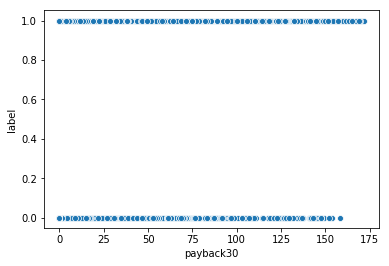

In [48]:
sns.scatterplot(x="payback30",y="label",data=data)


payback30 = average payback time in last 30 days we can understand defaulters have taken more time to payback the loan amount borrowed which ranges between 0-175 in case of non defaulters payback period is 0 -155 Therefore non defaulters have taken more payback time

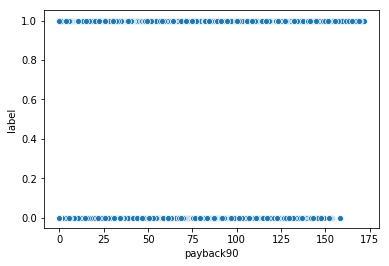

In [49]:
sns.scatterplot(x="payback90",y="label",data=data)


payback90 = average payback time in last 90 days we can understand defaulters have taken more time to payback the loan amount borrowed which ranges between 0-175 in case of non defaulters payback period is 0 -155 Therefore non defaulters have taken more payback time

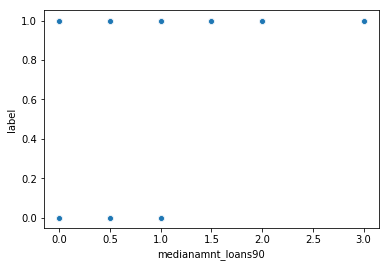

In [50]:
sns.scatterplot(x="medianamnt_loans90",y="label",data=data)


medianamnt_90 = median amount of loan taken in last 90 days observing last 90 days recharge amount defaulters have borrowed more amount compared to non defaulters

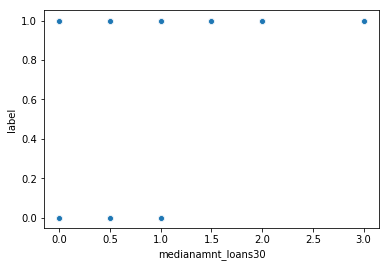

In [51]:
sns.scatterplot(x="medianamnt_loans30",y="label",data=data)


medianamnt_30 = median amount of loan taken in last 30 days non defaulters have borrowed upto 10,000 but non defaulter have borrowed upto 20,000 and few and took 30,000 Therfore defaulters have borrowed more amount compared to non defaulters.

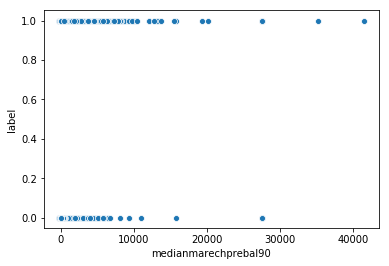

In [52]:
sns.scatterplot(x="medianmarechprebal90",y="label",data=data)

medianmarechprebal90 = median of main account balance made just before recharge in last 90 days we can observe the balance maintained by defaulters is 0 -15,000 and few balances are scattered in the range while non defaulters have maintained upto 10,000 and few maintained at 15,000 and 28,000 which depicts defaulters have maintained more balance compritively.

DATA PROCESSING

In [18]:
data= data.drop(['msisdn'], axis=1)


In [19]:
data= data.drop(['pdate'], axis=1)


In [20]:
data = pd.get_dummies(data=data, columns=['pmonth'])


In [21]:
data.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

label                      AxesSubplot(0.125,0.816017;0.168478x0.0639831)
aon                     AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
daily_decr30            AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
daily_decr90            AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
rental30                   AxesSubplot(0.125,0.739237;0.168478x0.0639831)
rental90                AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
last_rech_date_ma       AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
last_rech_date_da       AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
last_rech_amt_ma           AxesSubplot(0.125,0.662458;0.168478x0.0639831)
cnt_ma_rech30           AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
fr_ma_rech30            AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
sumamnt_ma_rech30       AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
medianamnt_ma_rech30       AxesSubplot(0.125,0.585678;0.168478x0.0639831)
medianmarechprebal30    AxesSubplot(0.

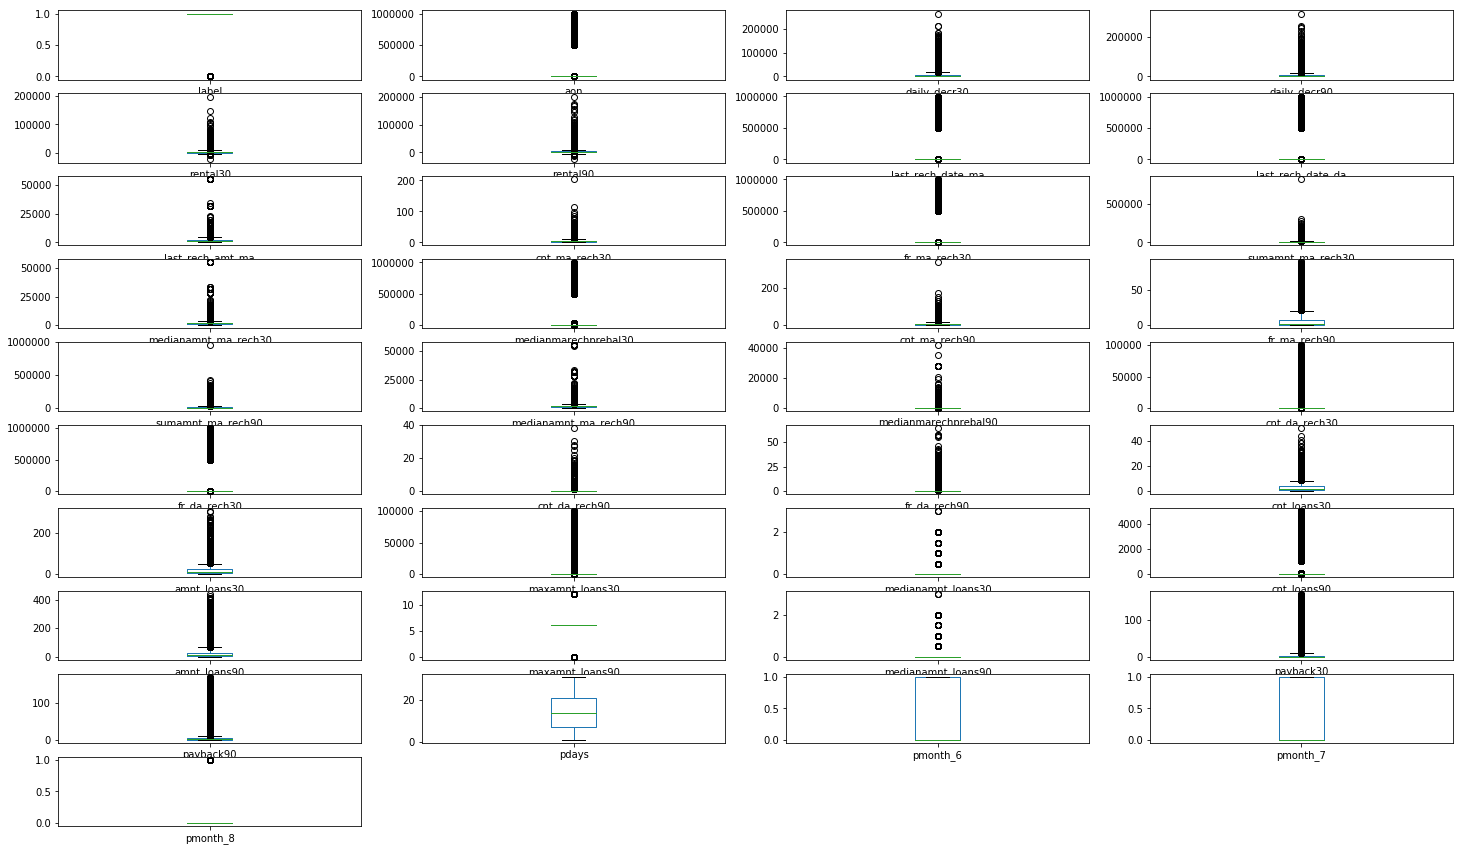

In [22]:
data.plot(kind='box',subplots= True,layout=(10,4),figsize=(25,15))


In [23]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64),
 array([15, 15, 32, ..., 28, 26, 30], dtype=int64))

In [24]:

new_data=data[(z<3).all(axis=1)]
new_data

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdays,pmonth_6,pmonth_7,pmonth_8
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,20,0,1,0
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,10,0,0,1
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,19,0,0,1
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,6,1,0,0
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,22,1,0,0
5,1,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,...,3.0,18,6,0.0,11.000000,8.333333,2,0,1,0
6,1,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,...,1.0,6,6,0.0,0.000000,0.000000,5,0,1,0
7,1,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,...,7.0,42,6,0.0,6.000000,3.857143,5,0,0,1
8,1,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,...,4.0,24,6,0.0,2.666667,2.666667,15,1,0,0
9,1,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,...,1.0,6,6,0.0,0.000000,0.000000,8,1,0,0


In [25]:
data.shape


(209593, 37)

In [26]:
new_data.shape


(161465, 37)

In [27]:
percentage_loss=((209593-161465)/209593)*100
print(percentage_loss)

22.962598941758554


In [28]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

label                       0.000
aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans9

In [29]:
new_data2=data[~((data<Q1-(1.5*IQR))|(data>(Q3+(1.5*IQR)))).any(axis=1)]
new_data2

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdays,pmonth_6,pmonth_7,pmonth_8
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,22,1,0,0
8,1,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,...,4.0,24,6,0.0,2.666667,2.666667,15,1,0,0
9,1,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,...,1.0,6,6,0.0,0.000000,0.000000,8,1,0,0
10,1,1511.0,12.896000,12.896000,790.44,790.44,8.0,0.0,1539,2,...,2.0,12,6,0.0,4.000000,4.000000,12,1,0,0
13,1,887.0,55.909333,55.909333,208.80,208.80,2.0,0.0,1539,5,...,5.0,30,6,0.0,2.600000,2.600000,16,1,0,0
17,1,929.0,10.688000,10.688000,40.00,40.00,0.0,0.0,0,0,...,1.0,6,6,0.0,0.000000,0.000000,16,1,0,0
23,1,857.0,58.023333,58.023333,479.44,479.44,2.0,0.0,1539,4,...,4.0,24,6,0.0,6.000000,6.000000,26,1,0,0
26,1,1179.0,3703.272000,3712.840000,340.96,376.42,2.0,0.0,770,6,...,5.0,30,6,0.0,6.000000,6.000000,6,0,1,0
32,1,191.0,5.266667,5.266667,1741.50,1741.50,0.0,0.0,0,0,...,1.0,6,6,0.0,0.000000,0.000000,10,1,0,0
34,1,234.0,82.950000,82.950000,474.00,474.00,11.0,0.0,1539,4,...,1.0,6,6,0.0,0.000000,0.000000,30,1,0,0


In [30]:
data.shape


(209593, 37)

In [31]:
percentage_loss=((209593-50102)/209593)*100
print(percentage_loss)

76.09557571102089


we are not removing outliers as we will lose huge data in bith the above methods

In [32]:
x= data.drop(['label','sumamnt_ma_rech30','sumamnt_ma_rech90','cnt_loans30','cnt_loans90','payback90'],axis=1)
print(x.shape)
y=data['label']
print(y.shape)

(209593, 31)
(209593,)


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.10357685, -0.25229941, -0.27634619, ..., -0.81096301,
         1.20158468, -0.49070354],
       [-0.09776412,  0.73103667,  0.5533797 , ..., -0.81096301,
        -0.83223431,  2.03789033],
       [-0.10010243, -0.43201111, -0.42903256, ..., -0.81096301,
        -0.83223431,  2.03789033],
       ...,
       [-0.09378769,  0.70079045,  0.53319431, ..., -0.81096301,
         1.20158468, -0.49070354],
       [-0.08428915,  0.77075515,  0.59455827, ..., -0.81096301,
         1.20158468, -0.49070354],
       [-0.08628398, -0.09674426, -0.14174607, ..., -0.81096301,
         1.20158468, -0.49070354]])

In [34]:
x.shape


(209593, 31)

In [35]:
y.shape

(209593,)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

importing models and metrics for analysis

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier



from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error

Finding the best parameters

In [38]:

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]

In [ ]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score of ',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************************************************************************')
    print('\n')

Accuracy Score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is:
0.8834657315298552
[[  914  4383]
 [  502 36120]]
              precision    recall  f1-score   support

           0       0.65      0.17      0.27      5297
           1       0.89      0.99      0.94     36622

   micro avg       0.88      0.88      0.88     41919
   macro avg       0.77      0.58      0.60     41919
weighted avg       0.86      0.88      0.85     41919

*****************************************************************************************************************


Accuracy Score of  GaussianNB(priors=None, var_smoothing=1e-09) is:
0.5139435578138791
[[ 4906   391]
 [19984 16638]]
              precision    recall  f1-score   support

           0       0.20      0.93      0.33    

CROSS VALIDATING THE MODEL

In [ ]:
models=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]

In [ ]:
for m in models:
    score=cross_val_score(m,x,y,cv=2,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print("MeanScore:",score.mean())
    print("Standard Deviation:",score.std())
    print('*****************************************************************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Score: [0.88312643 0.88397458]
MeanScore: 0.8835505022785919
Standard Deviation: 0.0004240769038196812
*****************************************************************************************************************


Model: GaussianNB(priors=None, var_smoothing=1e-09)
Score: [0.51213298 0.51497195]
MeanScore: 0.5135524632000223
Standard Deviation: 0.0014194822940804541
*****************************************************************************************************************


Model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=Fal

Using GridSearchCV to find out Best Parameter

In [ ]:
#RandomForestClassifier

In [ ]:
parameters={'criterion':('gini','entropy'),'n_estimators':range(1,10),'random_state': range(20,50)}
rf=RandomForestClassifier()

clf=GridSearchCV(rf,parameters)
clf.fit(x,y)
print(clf.best_params_)

In [ ]:
#AdaBoostClassifier

In [ ]:
parameters={'n_estimators':range(5,20),'algorithm':('SAMME','SAMME.R'),'random_state': range(20,40)}
adb=AdaBoostClassifier()

clf=GridSearchCV(adb,parameters)
clf.fit(x,y)
print(clf.best_params_)

In [ ]:
#GradientBoostingClassifier

In [ ]:
parameters={'n_estimators':range(5,20),'criterion':('friedman_mse','mse','mae')}
gbc=GradientBoostingClassifier()

clf=GridSearchCV(gbc,parameters)
clf.fit(x,y)
print(clf.best_params_)

In [ ]:
#BaggingClassifier

In [ ]:
parameters={'n_sample':20,'n_feature'=2,'n_estimators':range(5,20)}
bc=BaggingClassifier()

clf=GridSearchCV(bc,parameters)
clf.fit(x,y)
print(clf.best_params_)

In [39]:
#Applying results in models

In [40]:
RFC=RandomForestClassifier()
ABC=AdaBoostClassifier()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()

In [41]:
models=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]

In [42]:
models=[]

models.append(('RandomForestClassifier',RFC))
models.append(('AdaBoostClassifier',ABC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('BaggingClassifier',BC))

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,precision_score


********************** RandomForestClassifier **********************


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Accuracy_score = 0.9161955199312961


Cross_Val_Score = 0.9165716459763722


Recall = 0.966713997050953


Precision: 0.939


roc_auc_score=  0.7668193356974605


classification_report
               precision    recall  f1-score   support

           0       0.71      0.57      0.63      5297
           1       0.94      0.97      0.95     36622

   micro avg       0.92      0.92      0.92     41919
   macro avg       0.83      0.77      0.79     41919
weighted avg       0.91      0.92      0.91   

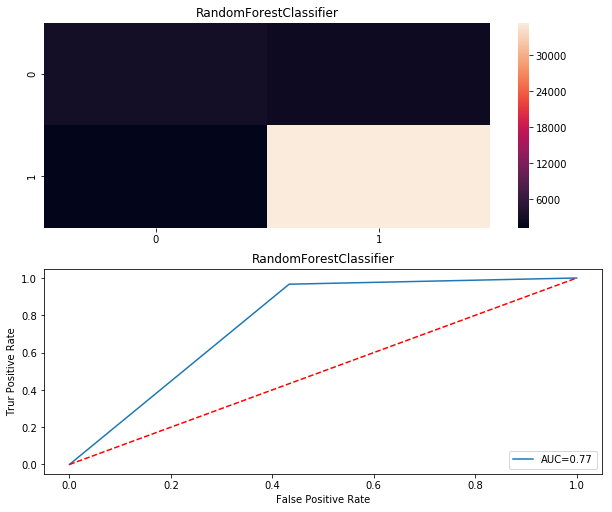

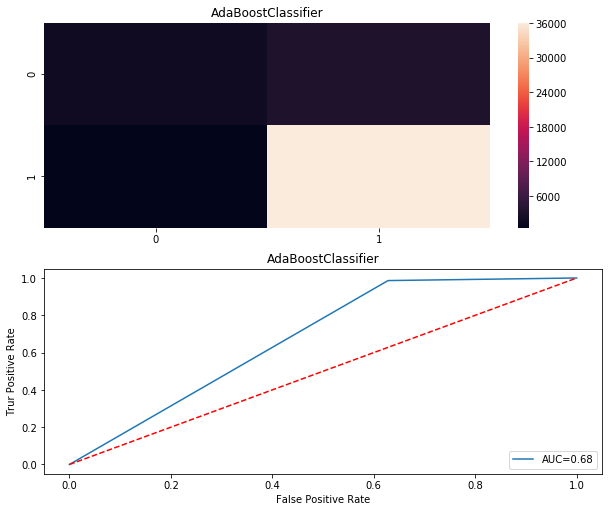

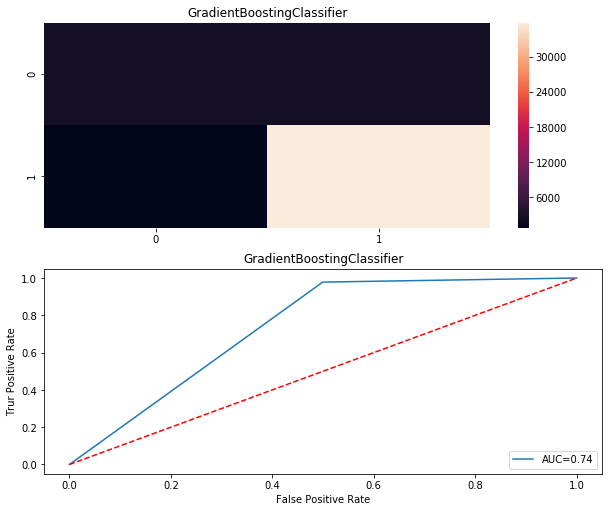

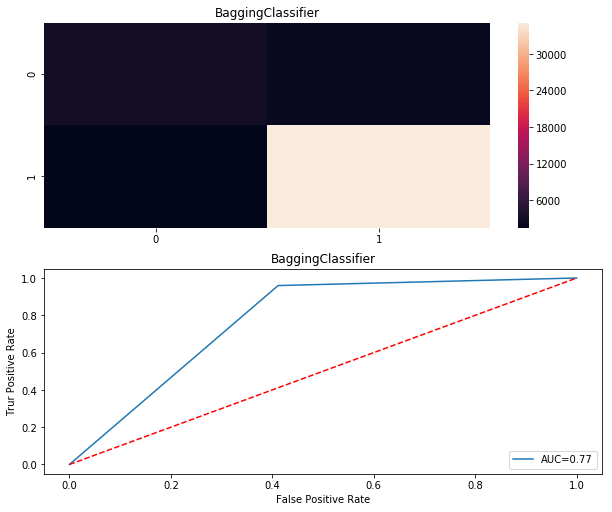

In [47]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('**********************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score =',sc)
    cvs.append(sc*100)
    print('\n')
    recall = recall_score(y_test,pre, average='binary')
    print('Recall =', recall)
    print('\n')
    precision = precision_score(y_test,pre, average='binary')
    print('Precision: %.3f' % precision)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score= ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=False))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('Trur Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [48]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'Roc_cuc_curve':rocscore,'Recall':recall,'precision':precision})
result

,Model,Accuracy_score,Cross_val_score,Roc_cuc_curve,Recall,precision
0,RandomForestClassifier,91.619552,91.657165,76.681934,0.959451,0.941607
1,AdaBoostClassifier,90.853789,91.014967,67.903225,0.959451,0.941607
2,GradientBoostingClassifier,91.767456,91.896674,73.932606,0.959451,0.941607
3,BaggingClassifier,91.259333,91.311256,77.404284,0.959451,0.941607


choosing GBC as best fit model

saving the model

In [50]:
import pickle
filename = 'micro_credit_finance.csv.pkl'
pickle.dump(GBC,open(filename,'wb'))

CONLUSION

In [51]:
a=np.array(y_test)
a

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [52]:
predict=np.array(GBC.predict(x_test))

In [53]:
df_pred=pd.DataFrame({"original":a,"predicted":predict},index=range(len(a)))

In [54]:
df_pred

,original,predicted
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1
5,1,1
6,0,1
7,1,1
8,0,1
9,1,1


From the above table the model is predicted the values at 91% accuracy.